In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/parit/Downloads/Position_Salaries.csv")

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## EDA

<Axes: xlabel='Level', ylabel='Salary'>

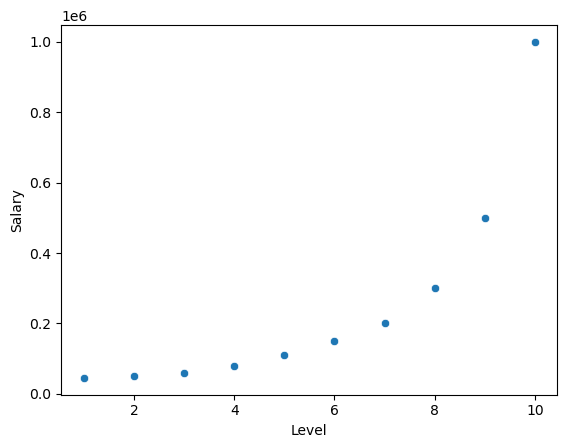

In [4]:
sns.scatterplot(x="Level",y="Salary",data=data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [6]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## checking null values

In [7]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [8]:
x=data["Level"].values.reshape(-1,1)

In [9]:
y=data["Salary"].values.reshape(-1,1)

## polynomial regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)

In [11]:
x_poly=poly.fit_transform(x)

In [45]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [46]:
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [12]:
poly.fit(x_poly,y)
print("training completed")

training completed


In [13]:
from sklearn.model_selection import train_test_split

In [24]:
x_poly_train,x_poly_test,y_train,y_test= train_test_split(x_poly,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()

In [26]:
model=lin.fit(x_poly_train,y_train)
print("training completed")

training completed


In [27]:
pred=model.predict(x_poly_test)
pred

array([[606335.60051157],
       [ 84934.89129171]])

In [28]:
print("accuracy score of training data=",model.score(x_poly_train,y_train))

accuracy score of training data= 0.9913280453724184


In [29]:
from sklearn.metrics import r2_score

In [30]:
print("r2_score of testing data=",r2_score(y_test,pred))

r2_score of testing data= 0.8762695647830209


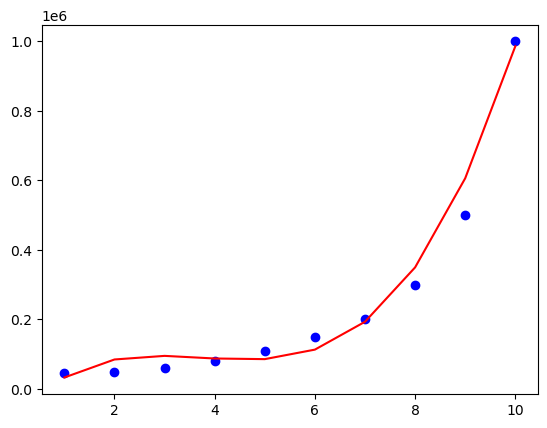

In [31]:
plt.scatter(x,y,color="b")
plt.plot(x,lin.predict(x_poly),color="r")

## Linear regression

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lin2=LinearRegression()

In [38]:
model2=lin2.fit(x_train,y_train)
print("training completed")

training completed


In [39]:
print("score of training data=",model2.score(x_train,y_train))

score of training data= 0.6822733031585659


In [40]:
from sklearn.metrics import r2_score

In [41]:
print("r2_score of testing data=",r2_score(y_test,lin2.predict(x_test)))

r2_score of testing data= -1.6958750485488299


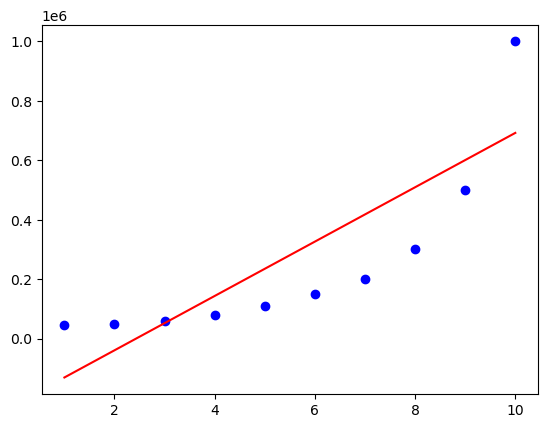

In [42]:
plt.scatter(x,y,color="b")
plt.plot(x,lin2.predict(x),color="r")